# Capstone Project - Places most Covid-19 infected cases and deaths in New York (Week 2)
### Applied Data Science Capstone by Rafael Mejia S.

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

The pandemic Covid-19 is a tragedy that affected a million of people around the world.

United States was not exception, especially New York City. It’s a place where the illness **growth exponentially** during the last three months.

For this reason, we need to know **the places** where the cases and deaths for Covid-19 were most affected. Which are the **features of the neighborhood and how can prevent for the future** the cases will not raise quickly.

## Data <a name="data"></a>

To solve the problem, we will use the dataset of Covid-19 belong to New York City governance. This data contains the Zip, Neighborhood, Borough, Cases, Cases per 100.000, Deaths per 100.000 and the Percent of people tested who tested positive.

This data we will combine with the location information of foursquare to get the features of each neighborhood and make a clustering to define the relationships between the positive cases/deaths and the neighborhoods in New York.

Finally, we will detect the clustering of neighborhoods most optimal and then give the suggestions to reduce the amount of infections in another similar pandemic.

### Load data of positive cases/deaths of Covid-19 in New York. 

Load the dataset with pandas libray

In [12]:
import pandas as pd

df_cases = pd.read_csv('data-zsnEP.csv')
df_cases.head()

,ZIP,Neighborhood,Borough,Cases,"Cases per 100,000","Deaths per 100,000",Percent of people tested who tested positive
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,366,1553.28,89.12,16.10
1,10002,Chinatown/Lower East Side,Manhattan,1049,1366.68,191.52,21.83
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,447,830.83,61.34,12.89
3,10004,Financial District,Manhattan,31,849.17,27.39,12.60
4,10005,Financial District,Manhattan,61,726.53,23.82,11.34


Rename the columns and group the data by Neighborhood and Borough

In [13]:
df_cases.rename(columns={'ZIP':'Postal Code', 'Cases per 100,000':'Cases/100K', 'Deaths per 100,000':'Deaths/100K','Percent of people tested who tested positive':'Percent_Positive_Tested'}, inplace=True)
df_cases_ny = df_cases.groupby(["Neighborhood", "Borough"], as_index = False).sum()
df_cases_ny.head()


,Neighborhood,Borough,Postal Code,Cases,Cases/100K,Deaths/100K,Percent_Positive_Tested
0,Airport/East Elmhurst,Queens,11369,1593,4368.90,438.81,35.61
1,Airport/South Jamaica/Springfield Gardens/St. ...,Queens,11434,2064,3056.14,228.03,30.83
2,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,10469,2977,4163.16,448.90,31.74
3,Allerton/Norwood/Pelham Parkway/Williamsbridge,Bronx,10467,3345,3318.98,290.72,31.39
4,Alphabet City/East Village/Stuyvesant Town-Coo...,Manhattan,10009,689,1172.81,110.64,15.72


View the top 10 neighborhood of cases and deaths of Covid-19

In [14]:
df_cases_ny.sort_values(["Cases/100K", "Deaths/100K"], inplace=True, ascending=False)
df_cases_ny

,Neighborhood,Borough,Postal Code,Cases,Cases/100K,Deaths/100K,Percent_Positive_Tested
137,Queens Village,Queens,22857,1601,6788.87,424.53,66.87
134,Ozone Park,Queens,22833,1586,5465.72,306.19,61.98
104,Hell's Kitchen/Midtown Manhattan,Manhattan,30073,1212,5173.64,270.83,49.36
74,East Harlem,Manhattan,20064,2746,5024.38,576.83,50.43
70,Cypress Hills/East New York,Brooklyn,22415,4417,4775.82,454.51,59.19
...,...,...,...,...,...,...,...
96,Gowanus/Park Slope/Windsor Terrace,Brooklyn,11215,619,885.14,61.49,15.37
78,East Village/Gramercy/Greenwich Village,Manhattan,10003,447,830.83,61.34,12.89
87,Flatiron/Gramercy/Kips Bay,Manhattan,10010,267,824.79,61.78,10.25
151,TriBeCa,Manhattan,10007,58,703.05,36.36,9.98


**Install the libraries of geolocalization like geopy and geocoder**

In [ ]:
pip install geopy

In [75]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


Get the locations of every neighborhood

In [18]:
import geocoder # import geocoder
import json # library to handle JSON files
from geopy.geocoders import Nominatim

column_names = ['Neighborhood', 'Borough', 'Postal Code', 'Cases', 'Cases/100K', 'Deaths/100k', 'Percent_Positive_Tested', 'Latitude', 'Longitude'] 

# Instantiate the dataframe
neighborhoods_covid = pd.DataFrame(columns=column_names)

# Getting the new dataframe with latitude y longitude
for ind in range(len(df_cases_ny)):
    address = df_cases_ny.loc[ind, "Neighborhood"] + ', ' + df_cases_ny.loc[ind, "Borough"]
    g = geocoder.arcgis('{}, ' + address.format(df_cases_ny.loc[ind, "Postal Code"]))
    neighborhoods_covid = neighborhoods_covid.append({'Neighborhood' :df_cases_ny.loc[ind, "Neighborhood"],   
                                                      'Borough' :df_cases_ny.loc[ind, 'Borough'],
                                                      'Postal Code' :df_cases_ny.loc[ind, 'Postal Code'],
                                                      'Cases' :df_cases_ny.loc[ind, 'Cases'],
                                                      'Cases/100K' :df_cases_ny.loc[ind, 'Cases/100K'],
                                                      'Deaths/100K' :df_cases_ny.loc[ind, 'Deaths/100K'],
                                                      'Percent_Positive_Tested' :df_cases_ny.loc[ind, 'Percent_Positive_Tested'],
                                                      'Latitude' :g.lat,
                                                      'Longitude' :g.lng
                                                     }, ignore_index=True)
    
    print(address + 'lat:' + str(g.lat) + 'long:' + str(g.lng))  

Airport/East Elmhurst, Queenslat:40.77003000000008long:-73.86828999999994
Airport/South Jamaica/Springfield Gardens/St. Albans, Queenslat:40.68238000000008long:-73.75322999999997
Allerton/Baychester/Pelham Gardens/Williamsbridge, Bronxlat:40.87725000000006long:-73.85659999999996
Allerton/Norwood/Pelham Parkway/Williamsbridge, Bronxlat:40.85796754701395long:-73.85122092210514
Alphabet City/East Village/Stuyvesant Town-Cooper Village, Manhattanlat:40.714500000000044long:-74.00600999999995
Annadale/Rossville, Staten Islandlat:54.11978459449485long:-6.740394286427376
Arrochar/Midland Beach/Shore Acres/South Beach Ocean Breeze, Staten Islandlat:40.02182000000005long:-74.10314999999997
Arverne/Broad Channel, Queenslat:40.60315000000003long:-73.82139999999998
Arverne/Edgemere, Queenslat:40.592501008360834long:-73.78670520484069
Astoria (North), Queenslat:40.75044037275811long:-73.93902923905317
Astoria (North)/Astoria (South), Queenslat:40.76881899265384long:-73.90650461769233
Astoria (South)

Show in the map the neighborhoods with cases infected in New York City

In [27]:
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

# Create map of New York using latitude and longitude values
address = 'New York, USA'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_covid['Latitude'], neighborhoods_covid['Longitude'], neighborhoods_covid['Borough'], neighborhoods_covid['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
                        [lat, lng],
                        radius=5,
                        popup=label,
                        color='blue',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.7,
                        parse_html=False).add_to(map_newyork)
    
map_newyork

Show in the map the top 20 neighborhoods with most cases/deaths of Covid-19

In [244]:
# Get the top 20 neighborhoods with Covid-19 cases/deaths
limit = 20
neighborhoods_top20 = neighborhoods_covid.iloc[0:limit, :].sort_values(["Cases/100K", "Deaths/100K"], inplace=False, ascending=False)

# Add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_top20['Latitude'], neighborhoods_top20['Longitude'], neighborhoods_top20['Borough'], neighborhoods_top20['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
                        [lat, lng],
                        radius=10,
                        popup=label,
                        color='red',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.7,
                        parse_html=False).add_to(map_newyork)
    
map_newyork

### Foursquare
Now we have to identify the features for every most infected/deaths neighborhoods through foursquare.


#### Define Foursquare Credentials and Version

In [456]:
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXXXXXXXXXXXXXXXXXXXX
CLIENT_SECRET:XXXXXXXXXXXXXXXXXX


Now, let's get the top 20 venues that are near of each neighborhood  within a radius of 1000 meters.
First, let's create the GET request URL. Name your URL url.

In [136]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

LIMIT = 20 # limit of number of venues returned by Foursquare API
radius_limit = 1000 # define radius
neighborhood_latitude = 0
neighborhood_longitude = 0

# Create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url # Display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NH2KN2UXDJXIEETQQLNOIT1ZJFX4YIPA4EPPSKZC1MEEAIPE&client_secret=O4AF3AI1SGO4MVO2HUXNOPZBGGJK4NE55MZECZS4SFU4XST1&v=20180604&ll=0,0&radius=1000&limit=20'

Function to get the category name of the data result

In [128]:
# Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Function to get the category of the venues

In [133]:
# Function that extracts the category of the venue
def getNearbyVenues(names, latitudes, longitudes, radius=radius_limit):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
        nearby_venues = json_normalize(results) # flatten JSON

        # filter columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby_venues = nearby_venues.loc[:, filtered_columns]

        # filter the category for each row
        nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

        # clean columns
        nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now run the above function on each neighborhood and create a new dataframe called neighborhood_covid_venues

In [137]:
neighborhood_covid_venues = getNearbyVenues(names=neighborhoods_top20['Neighborhood'],
                                            latitudes=neighborhoods_top20['Latitude'],
                                            longitudes=neighborhoods_top20['Longitude']
                                           )

C:\Users\rafic\anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


#### Check the size of the resulting dataframe

In [377]:
print(neighborhood_covid_venues.shape)
neighborhood_covid_venues.head()

(392, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Queens Village,40.71481,-73.75076,Le Bon Pain,40.715664,-73.747200,Bakery
1,Queens Village,40.71481,-73.75076,Dunkin',40.714977,-73.748789,Donut Shop
2,Queens Village,40.71481,-73.75076,Elena's 43,40.718392,-73.757607,Latin American Restaurant
3,Queens Village,40.71481,-73.75076,Victor's Coffee Shop,40.716153,-73.744803,Coffee Shop
4,Queens Village,40.71481,-73.75076,T-Mobile,40.713441,-73.754146,Mobile Phone Shop


Let's check how many uniques venues categories were returned

In [139]:
print('There are {} uniques categories.'.format(len(neighborhood_covid_venues['Venue Category'].unique())))

There are 135 uniques categories.


## Methodology <a name="methodology"></a>

As we did in the first part of this project, we knew the top 20 neighborhoods with most infected cases/death with Covid-19. Also, we have the venues/categories regarding of each neighborhood within 1km around took from Foursquare.

Now we will analyze the most visited top 5 venue categories got from every neighborhood and finally, we will identify the relations between each category through clustering the neighborhoods with K-means algorithm to discover the more optimal features of every cluster and know why were more infected in these places.

## Analysis <a name="analysis"></a>

First we will generate a dataframe with the top 5 categories for every neighborhoods.

In [140]:
import numpy as np # library to handle data in a vectorized manner

# One hot encoding
venues_onehot = pd.get_dummies(neighborhood_covid_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = neighborhood_covid_venues['Neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Neighborhood,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Museum,Asian Restaurant,BBQ Joint,...,Tourist Information Center,Track,Trail,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Zoo,Zoo Exhibit
0,Queens Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Queens Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Queens Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Queens Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Queens Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [141]:
venues_onehot.shape

(392, 136)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [142]:
ny_grouped = venues_onehot.groupby('Neighborhood').mean().reset_index()
ny_grouped

,Neighborhood,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Museum,Asian Restaurant,BBQ Joint,...,Tourist Information Center,Track,Trail,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Zoo,Zoo Exhibit
0,Airport/East Elmhurst,0.00,0.15,0.15,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Allerton/Baychester/Pelham Gardens/Williamsbridge,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Belle Harbor-Neponsit/Rockaway Park,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Co-op City/Edenwald,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.05,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Corona/North Corona,0.00,0.00,0.00,0.00,0.0,0.10,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00
5,Country Club/Throgs Neck,0.00,0.00,0.00,0.15,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Cypress Hills/East New York,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,East Harlem,0.05,0.00,0.00,0.05,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00
8,East New York,0.00,0.00,0.00,0.00,0.0,0.00,0.05,0.00,0.00,...,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.05
9,Edgemere/Far Rockaway,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Confirm the new size

In [143]:
ny_grouped.shape

(20, 136)

#### View each neighborhood along with the top 5 most common venue

In [294]:
num_top_venues = 5

for hood in ny_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ny_grouped[ny_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')   
    

----Airport/East Elmhurst----
             venue  freq
0  Airport Service  0.15
1   Airport Lounge  0.15
2     Burger Joint  0.10
3        Hotel Bar  0.10
4      Coffee Shop  0.10


----Allerton/Baychester/Pelham Gardens/Williamsbridge----
                  venue  freq
0  Caribbean Restaurant  0.15
1               Brewery  0.05
2            Soup Place  0.05
3           Supermarket  0.05
4             Nightclub  0.05


----Belle Harbor-Neponsit/Rockaway Park----
                venue  freq
0               Beach  0.40
1       Deli / Bodega  0.10
2                 Pub  0.10
3               Trail  0.05
4  Mexican Restaurant  0.05


----Co-op City/Edenwald----
                  venue  freq
0              Pharmacy  0.10
1           Pizza Place  0.10
2         Shopping Mall  0.10
3  Caribbean Restaurant  0.10
4          Cocktail Bar  0.05


----Corona/North Corona----
                       venue  freq
0  Latin American Restaurant  0.10
1     Argentinian Restaurant  0.10
2         Italian Res

Let's put that into a pandas dataframe.

First, let's write a function to sort the venues in descending order.

In [145]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 categories venues for each neighborhood.

In [363]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Airport/East Elmhurst,Airport Lounge,Airport Service,Hotel Bar,Coffee Shop,Burger Joint
1,Allerton/Baychester/Pelham Gardens/Williamsbridge,Caribbean Restaurant,Pizza Place,Discount Store,Donut Shop,Soup Place
2,Belle Harbor-Neponsit/Rockaway Park,Beach,Pub,Deli / Bodega,Chinese Restaurant,Bagel Shop
3,Co-op City/Edenwald,Caribbean Restaurant,Pharmacy,Shopping Mall,Pizza Place,Fast Food Restaurant
4,Corona/North Corona,Pizza Place,Argentinian Restaurant,Latin American Restaurant,Italian Restaurant,Ice Cream Shop
5,Country Club/Throgs Neck,Pizza Place,American Restaurant,Ice Cream Shop,Bank,Cuban Restaurant
6,Cypress Hills/East New York,Pizza Place,Grocery Store,Ice Cream Shop,Bank,Donut Shop
7,East Harlem,Bar,African Restaurant,Tennis Court,Gym / Fitness Center,Gym
8,East New York,Garden,Park,Botanical Garden,Zoo Exhibit,Theme Park Ride / Attraction
9,Edgemere/Far Rockaway,Beach,Supermarket,Bank,Donut Shop,Pizza Place


In [364]:
df_can_t = neighborhoods_venues_sorted['1st Most Common Venue']
df_can_t['Count'] = df_can_t.count()
df_can_t.shape

(21,)

Join the dataframe of cases/deaths neighborhoods and most common categories venues

In [379]:
df_temp = pd.DataFrame(neighborhoods_top20, columns = ['Neighborhood', 'Cases/100K', 'Deaths/100K', 'Percent_Positive_Tested', 'Latitude', 'Longitude'])
df_result = pd.merge(df_temp, neighborhoods_venues_sorted, how='inner', on = 'Neighborhood')
df_result

,Neighborhood,Cases/100K,Deaths/100K,Percent_Positive_Tested,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Queens Village,6788.87,424.53,66.87,40.714810,-73.750760,Donut Shop,Discount Store,Pizza Place,Bus Stop,Ice Cream Shop
1,Ozone Park,5465.72,306.19,61.98,40.680120,-73.847360,Pizza Place,Gym,Pharmacy,Bar,Health Food Store
2,Hell's Kitchen/Midtown Manhattan,5173.64,270.83,49.36,40.760310,-74.002850,Gym,Ice Cream Shop,Bike Rental / Bike Share,Gift Shop,Food Court
3,East Harlem,5024.38,576.83,50.43,40.815704,-73.934446,Bar,African Restaurant,Tennis Court,Gym / Fitness Center,Gym
4,Cypress Hills/East New York,4775.82,454.51,59.19,40.690358,-73.877382,Pizza Place,Grocery Store,Ice Cream Shop,Bank,Donut Shop
5,Airport/East Elmhurst,4368.90,438.81,35.61,40.770030,-73.868290,Airport Lounge,Airport Service,Hotel Bar,Coffee Shop,Burger Joint
6,Lenox Hill/Upper East Side,4193.38,424.45,43.23,40.773810,-73.959710,Bakery,Italian Restaurant,Coffee Shop,French Restaurant,Paper / Office Supplies Store
7,Allerton/Baychester/Pelham Gardens/Williamsbridge,4163.16,448.90,31.74,40.877250,-73.856600,Caribbean Restaurant,Pizza Place,Discount Store,Donut Shop,Soup Place
8,East New York,4140.70,620.30,29.77,40.666461,-73.967216,Garden,Park,Botanical Garden,Zoo Exhibit,Theme Park Ride / Attraction
9,Jackson Heights/Rikers Island,4032.52,152.63,34.34,40.749400,-73.887560,Farmers Market,Food Truck,Arepa Restaurant,Bakery,Thai Restaurant


Now we can explore the relationships between the **cases/deaths/percent_positive_tested** and most common **venues categories**

Text(0, 0.5, 'Venues Category')

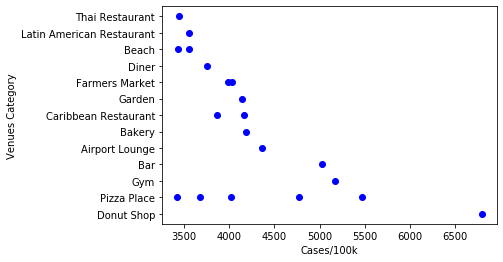

In [380]:
plt.scatter(df_result["Cases/100K"], df_result["1st Most Common Venue"], color='blue')
plt.xlabel("Cases/100k")
plt.ylabel("Venues Category")

Text(0, 0.5, 'Venues Category')

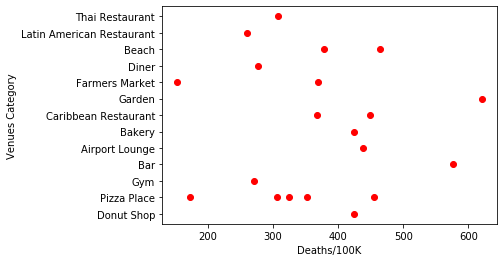

In [381]:
plt.scatter(df_result["Deaths/100K"], df_result["1st Most Common Venue"], color='red')
plt.xlabel("Deaths/100K")
plt.ylabel("Venues Category")

Text(0, 0.5, 'Venues Category')

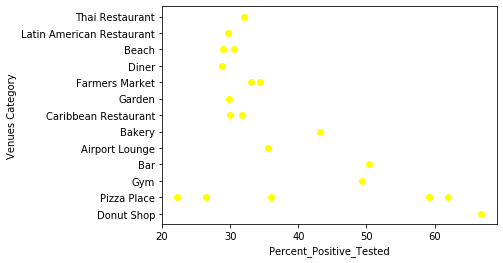

In [382]:
plt.scatter(df_result["Percent_Positive_Tested"], df_result["1st Most Common Venue"], color='yellow')
plt.xlabel("Percent_Positive_Tested")
plt.ylabel("Venues Category")

Import the libraries to make the clustering with k-means and plot the results on the New York map

In [383]:
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns

In [384]:
ny_grouped_clustering.head()

,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Museum,Asian Restaurant,BBQ Joint,Bagel Shop,...,Tourist Information Center,Track,Trail,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Zoo,Zoo Exhibit
0,0.0,0.15,0.15,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.05,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.05,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,0.0,0.00,0.00,0.0,0.0,0.1,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.05,0.0


Process to get the best value of K with **silhouette_avg** and **elbow** methods

For n_clusters = 2 The average silhouette_score is : 0.1416357207815753
For n_clusters = 3 The average silhouette_score is : 0.15626182241596792
For n_clusters = 4 The average silhouette_score is : 0.10727002617160457
For n_clusters = 5 The average silhouette_score is : 0.10127641846402476
For n_clusters = 6 The average silhouette_score is : 0.09283780680471007
For n_clusters = 7 The average silhouette_score is : 0.13140143641138
For n_clusters = 8 The average silhouette_score is : 0.12971286714015517
For n_clusters = 9 The average silhouette_score is : 0.12831980036515797
For n_clusters = 10 The average silhouette_score is : 0.1268479329030705
For n_clusters = 11 The average silhouette_score is : 0.12230592815501277
[1.1942483660130718, 1.0058333333333334, 0.8838194444444445, 0.7938194444444446, 0.720462962962963, 0.6276666666666668, 0.5573148148148148, 0.4867592592592593, 0.42625, 0.36392857142857143]


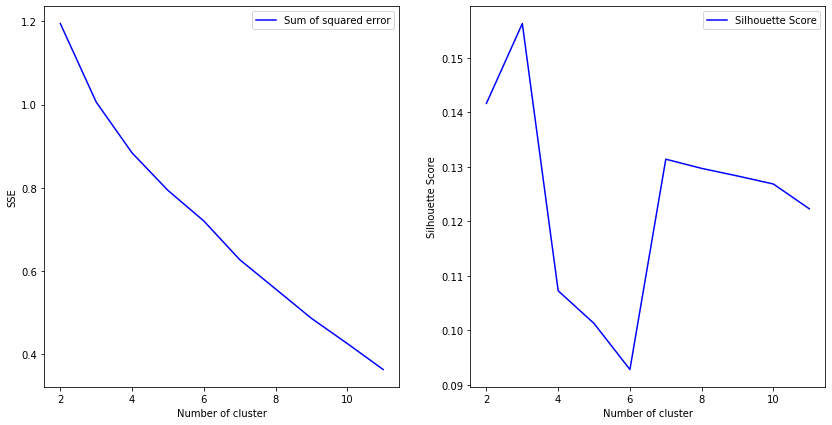

In [385]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   cluster_labels = clusterer.fit_predict(ny_grouped_clustering)
   #Finding the average silhouette score
   silhouette_avg = metrics.silhouette_score(ny_grouped_clustering, cluster_labels)
   ss.append(silhouette_avg)
   print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
   #Finding the average SSE"
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
x = np.array(ss) # x is a numpy array now
y = np.array(elbow)   
z = np.array(n_clusters)
print(elbow)
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, y,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(range_n_clusters, x,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

We watch the optimal value for K is 3

In [386]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# set number of clusters
kclusters = 3

ny_grouped_clustering = ny_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0])

We assign the labels to each row in dataframe.

In [387]:
df_result["Cluster Labels"] = labels
df_result.head(5)

,Neighborhood,Cases/100K,Deaths/100K,Percent_Positive_Tested,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
0,Queens Village,6788.87,424.53,66.87,40.714810,-73.750760,Donut Shop,Discount Store,Pizza Place,Bus Stop,Ice Cream Shop,0
1,Ozone Park,5465.72,306.19,61.98,40.680120,-73.847360,Pizza Place,Gym,Pharmacy,Bar,Health Food Store,0
2,Hell's Kitchen/Midtown Manhattan,5173.64,270.83,49.36,40.760310,-74.002850,Gym,Ice Cream Shop,Bike Rental / Bike Share,Gift Shop,Food Court,1
3,East Harlem,5024.38,576.83,50.43,40.815704,-73.934446,Bar,African Restaurant,Tennis Court,Gym / Fitness Center,Gym,0
4,Cypress Hills/East New York,4775.82,454.51,59.19,40.690358,-73.877382,Pizza Place,Grocery Store,Ice Cream Shop,Bank,Donut Shop,0


Assign the value to the **ny_merged** variable

In [388]:
ny_merged = df_result
ny_merged.head()

,Neighborhood,Cases/100K,Deaths/100K,Percent_Positive_Tested,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
0,Queens Village,6788.87,424.53,66.87,40.714810,-73.750760,Donut Shop,Discount Store,Pizza Place,Bus Stop,Ice Cream Shop,0
1,Ozone Park,5465.72,306.19,61.98,40.680120,-73.847360,Pizza Place,Gym,Pharmacy,Bar,Health Food Store,0
2,Hell's Kitchen/Midtown Manhattan,5173.64,270.83,49.36,40.760310,-74.002850,Gym,Ice Cream Shop,Bike Rental / Bike Share,Gift Shop,Food Court,1
3,East Harlem,5024.38,576.83,50.43,40.815704,-73.934446,Bar,African Restaurant,Tennis Court,Gym / Fitness Center,Gym,0
4,Cypress Hills/East New York,4775.82,454.51,59.19,40.690358,-73.877382,Pizza Place,Grocery Store,Ice Cream Shop,Bank,Donut Shop,0


In [389]:
# Create map with the three clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_merged['Latitude'], ny_merged['Longitude'], ny_merged['Neighborhood'], ny_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Now examining each cluster**

Function to graph categories venue of each cluster

In [445]:
def graph_summary_clusters(dataset, number_cluster, array_color_list, array_explode_list):
    '''
    Graph in a pie the summary of categories venue of a cluster
    
    INPUT:
        dataset : the data to graph
        number_cluster : the number of a cluster to graph
        array_color_list : color list to graph
        array_explode_list : ratio list to graph
    OUTPUT:
        Graph the pie.
    '''
    df_cluster = dataset.loc[dataset['Cluster Labels'] == number_cluster]
    df_summary = df_cluster.groupby('1st Most Common Venue', axis=0).count()

    # Create empty lists to store values for plotting graphs
    colors_list = array_color_list # color for each category
    explode_list = array_explode_list # ratio for each category

    df_summary['Neighborhood'].plot(kind='pie',
                                    figsize=(15, 6),
                                    autopct='%1.1f%%', # add in percentages
                                    startangle=90, # start angle 90° (Africa)
                                    shadow=True, # add shadow
                                    labels=None,
                                    pctdistance=1.12, # the ratio between the center of each pie slice and the start of the text generated by autopct
                                    colors=colors_list, # add custom colors
                                    explode=explode_list
                                    )
    plt.title('Cluster ' + str(number_cluster) + ' - 1st Most Common Venue')
    plt.axis('equal') # Sets the pie chart to look like a circle.
    # add legend
    plt.legend(labels=df_summary.index, loc='upper left')
    plt.show()

For **Cluster 0** show the amount of cases/deaths per 100k persons and the percent of each **1st Most Common Venue**

In [446]:
ny_merged.loc[ny_merged['Cluster Labels'] == 0, ny_merged.columns[[1] + list(range(0, ny_merged.shape[1]))]]

,Cases/100K,Neighborhood,Cases/100K,Deaths/100K,Percent_Positive_Tested,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
0,6788.87,Queens Village,6788.87,424.53,66.87,40.714810,-73.750760,Donut Shop,Discount Store,Pizza Place,Bus Stop,Ice Cream Shop,0
1,5465.72,Ozone Park,5465.72,306.19,61.98,40.680120,-73.847360,Pizza Place,Gym,Pharmacy,Bar,Health Food Store,0
3,5024.38,East Harlem,5024.38,576.83,50.43,40.815704,-73.934446,Bar,African Restaurant,Tennis Court,Gym / Fitness Center,Gym,0
4,4775.82,Cypress Hills/East New York,4775.82,454.51,59.19,40.690358,-73.877382,Pizza Place,Grocery Store,Ice Cream Shop,Bank,Donut Shop,0
5,4368.90,Airport/East Elmhurst,4368.90,438.81,35.61,40.770030,-73.868290,Airport Lounge,Airport Service,Hotel Bar,Coffee Shop,Burger Joint,0
6,4193.38,Lenox Hill/Upper East Side,4193.38,424.45,43.23,40.773810,-73.959710,Bakery,Italian Restaurant,Coffee Shop,French Restaurant,Paper / Office Supplies Store,0
7,4163.16,Allerton/Baychester/Pelham Gardens/Williamsbridge,4163.16,448.90,31.74,40.877250,-73.856600,Caribbean Restaurant,Pizza Place,Discount Store,Donut Shop,Soup Place,0
8,4140.70,East New York,4140.70,620.30,29.77,40.666461,-73.967216,Garden,Park,Botanical Garden,Zoo Exhibit,Theme Park Ride / Attraction,0
9,4032.52,Jackson Heights/Rikers Island,4032.52,152.63,34.34,40.749400,-73.887560,Farmers Market,Food Truck,Arepa Restaurant,Bakery,Thai Restaurant,0
11,3986.39,Jackson Heights,3986.39,369.23,33.11,40.749400,-73.887560,Farmers Market,Food Truck,Arepa Restaurant,Bakery,Thai Restaurant,0


In [447]:
cluster = 0
df_cases = ny_merged.loc[ny_merged['Cluster Labels'] == cluster]
df_cases.sum()

Neighborhood               Queens VillageOzone ParkEast HarlemCypress Hil...
Cases/100K                                                           68441.5
Deaths/100K                                                          5977.94
Percent_Positive_Tested                                               622.04
Latitude                                                             652.224
Longitude                                                           -1181.98
1st Most Common Venue      Donut ShopPizza PlaceBarPizza PlaceAirport Lou...
2nd Most Common Venue      Discount StoreGymAfrican RestaurantGrocery Sto...
3rd Most Common Venue      Pizza PlacePharmacyTennis CourtIce Cream ShopH...
4th Most Common Venue      Bus StopBarGym / Fitness CenterBankCoffee Shop...
5th Most Common Venue      Ice Cream ShopHealth Food StoreGymDonut ShopBu...
Cluster Labels                                                             0
dtype: object

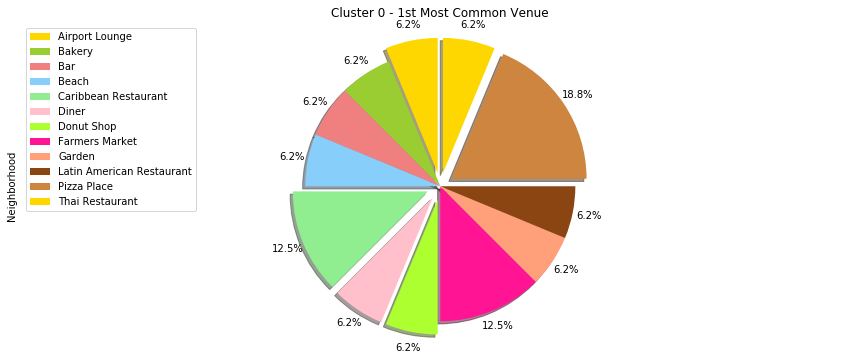

In [448]:
array_color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'greenyellow', 'deeppink', 'lightsalmon', 'saddlebrown', 'peru']
array_explode_list = [0.1, 0, 0, 0, 0.1, 0.1, 0.1, 0, 0, 0, 0.1, 0.1]
graph_summary_clusters(ny_merged, cluster, array_color_list, array_explode_list)

For **Cluster 1** show the amount of cases/deaths per 100k persons and the percent of each **1st Most Common Venue**

In [449]:
ny_merged.loc[ny_merged['Cluster Labels'] == 1, ny_merged.columns[[1] + list(range(0, ny_merged.shape[1]))]]

,Cases/100K,Neighborhood,Cases/100K,Deaths/100K,Percent_Positive_Tested,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
2,5173.64,Hell's Kitchen/Midtown Manhattan,5173.64,270.83,49.36,40.76031,-74.00285,Gym,Ice Cream Shop,Bike Rental / Bike Share,Gift Shop,Food Court,1


In [451]:
cluster = 1
df_cases = ny_merged.loc[ny_merged['Cluster Labels'] == cluster]
df_cases.sum()

Neighborhood               Hell's Kitchen/Midtown Manhattan
Cases/100K                                          5173.64
Deaths/100K                                          270.83
Percent_Positive_Tested                               49.36
Latitude                                            40.7603
Longitude                                          -74.0028
1st Most Common Venue                                   Gym
2nd Most Common Venue                        Ice Cream Shop
3rd Most Common Venue              Bike Rental / Bike Share
4th Most Common Venue                             Gift Shop
5th Most Common Venue                            Food Court
Cluster Labels                                            1
dtype: object

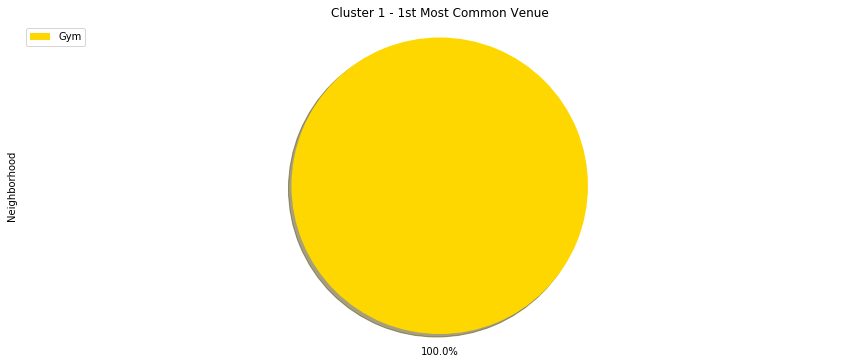

In [452]:
array_color_list = ['gold']
array_explode_list = [0.1]
graph_summary_clusters(ny_merged, cluster, array_color_list, array_explode_list)

For **Cluster 2** show the amount of cases/deaths per 100k persons and the percent of each **1st Most Common Venue**

In [453]:
ny_merged.loc[ny_merged['Cluster Labels'] == 2, ny_merged.columns[[1] + list(range(0, ny_merged.shape[1]))]]

,Cases/100K,Neighborhood,Cases/100K,Deaths/100K,Percent_Positive_Tested,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
10,4021.72,Corona/North Corona,4021.72,352.17,36.04,40.744104,-73.859617,Pizza Place,Argentinian Restaurant,Latin American Restaurant,Italian Restaurant,Ice Cream Shop,2
14,3675.77,Fieldston/North Riverdale/Riverdale,3675.77,324.75,22.23,40.908340,-73.903730,Pizza Place,Pool,Burger Joint,Italian Restaurant,Bank,2
15,3562.44,Edgemere/Far Rockaway,3562.44,464.80,30.57,40.596808,-73.758789,Beach,Supermarket,Bank,Donut Shop,Pizza Place,2


In [454]:
cluster = 2
df_cases = ny_merged.loc[ny_merged['Cluster Labels'] == cluster]
df_cases.sum()

Neighborhood               Corona/North CoronaFieldston/North Riverdale/R...
Cases/100K                                                           11259.9
Deaths/100K                                                          1141.72
Percent_Positive_Tested                                                88.84
Latitude                                                             122.249
Longitude                                                           -221.522
1st Most Common Venue                            Pizza PlacePizza PlaceBeach
2nd Most Common Venue                  Argentinian RestaurantPoolSupermarket
3rd Most Common Venue              Latin American RestaurantBurger JointBank
4th Most Common Venue         Italian RestaurantItalian RestaurantDonut Shop
5th Most Common Venue                          Ice Cream ShopBankPizza Place
Cluster Labels                                                             6
dtype: object

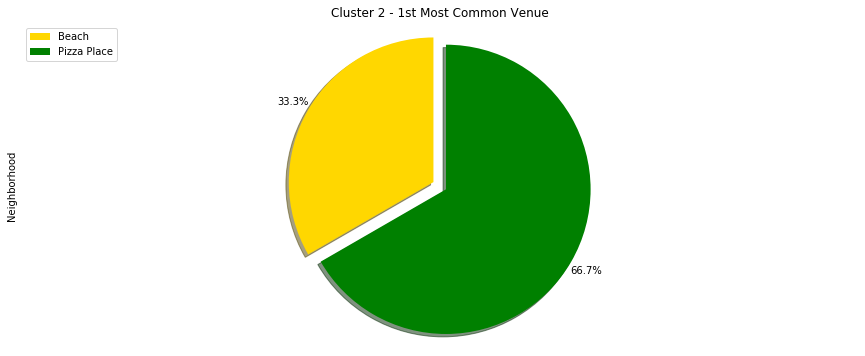

In [455]:
array_color_list = ['gold', 'green']
array_explode_list = [0.1, 0]
graph_summary_clusters(ny_merged, cluster, array_color_list, array_explode_list)

## Results and Discussion <a name="results"></a>

After the analysis and preparing the data, we focus on the top 20 most covid-19 cases/deaths neighborhoods and we found the top 5 venues categories of each neighborhood. We segment and clustering the neighborhoods with k-means algorithm and the most optimal was with three clusters.

The critical place of cases is the cluster 0 because in those neighborhoods there are many venues to conglomeration people, this in a concentration of food places like restaurants, bars, pubs and beach with more than 68.000 cases confirmed. 

In the cluster 1 is an important place: Gym, only in this neighborhood are more 5.000 cases per 100.000 persons. A gym is a cabin where the people produce perspiration and the manipulations of equipment is frequently. Another places like bike rental/bike shares is other focal point of infection for the manipulations of every bike was not with the best sanitation.

For the last cluster, we can identify the beach as a focal venue of infection and also the restaurants. In this cluster we have more than 11.000 cases per 100.000 persons.

## Conclusion <a name="conclusion"></a>

The purpose of these study is to identify the common places of New York city with the most infections on the neighborhoods. This information can help to the government of the state to know which are the venues where can prevent other contagious with the measures of social distancing, biosecurity, sanitization and disinfection particularly for manipulations of any equipment. 

Other important point is a strong campaign of informative in these venues to prevent more infected and deaths with covid-19.

Also, these analyses can help to others cities to know more the behavior of the specific neighborhood that can help to improve the public health system, education of social distancing preventions and get the best hygiene in every place.